<a href="https://colab.research.google.com/github/SulemanHamdani/CagnusMarlsen/blob/master/chess_classificaition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q --upgrade ipython
# !pip install -q --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.6/797.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=5.5.6, but you have ipykernel 6.22.0 which is incompatible.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.1 which is incompatible.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# load data
x = np.load('/content/drive/MyDrive/x_new.npy').reshape(-1,64)
y = np.load('/content/drive/MyDrive/y_new.npy')

In [8]:
winning_labels = [f"Winning-{i}" for i in range(1, 8)]
losing_labels = [f"Losing-{i}" for i in range(1, 8)]
draw_label = "Draw"

# Initialize the label list
labels = []

# Assign labels based on the evaluation values
for i in range(len(y)):
    if y[i] > 1.5:
        labels.append(winning_labels[min(int((y[i]-1.5)/1), 6)])
    elif y[i] < -1.5:
        labels.append(losing_labels[min(int((abs(y[i])-1.5)/1), 6)])
    else:
        labels.append(draw_label)

In [9]:
labels = np.array(labels)
for i in range(len(labels)):
    if labels[i].startswith('Winning'):
        labels[i] = int(labels[i].split('-')[1])
    elif labels[i].startswith('Losing'):
        labels[i] = -int(labels[i].split('-')[1])
    elif labels[i] == 'Draw':
        labels[i] = 0

Batch 1/50617 - loss: 2.8736 - accuracy: 0.0508
Batch 101/50617 - loss: 1.5962 - accuracy: 0.5352
Batch 201/50617 - loss: 0.9538 - accuracy: 0.6055
Batch 301/50617 - loss: 1.1664 - accuracy: 0.7070
Batch 401/50617 - loss: 1.1717 - accuracy: 0.4531
Batch 501/50617 - loss: 1.0323 - accuracy: 0.5977
Batch 601/50617 - loss: 1.2011 - accuracy: 0.5625
Batch 701/50617 - loss: 1.2322 - accuracy: 0.4336
Batch 801/50617 - loss: 1.1608 - accuracy: 0.3516
Batch 901/50617 - loss: 0.9460 - accuracy: 0.5898
Batch 1001/50617 - loss: 1.1636 - accuracy: 0.4766
Batch 1101/50617 - loss: 1.5801 - accuracy: 0.0234
Batch 1201/50617 - loss: 1.0133 - accuracy: 0.5195
Batch 1301/50617 - loss: 1.0302 - accuracy: 0.4766
Batch 1401/50617 - loss: 1.5532 - accuracy: 0.2969
Batch 1501/50617 - loss: 0.8980 - accuracy: 0.6172
Batch 1601/50617 - loss: 1.0382 - accuracy: 0.5039
Batch 1701/50617 - loss: 1.0326 - accuracy: 0.4414
Batch 1801/50617 - loss: 1.1478 - accuracy: 0.5039
Batch 1901/50617 - loss: 1.3173 - accuracy:

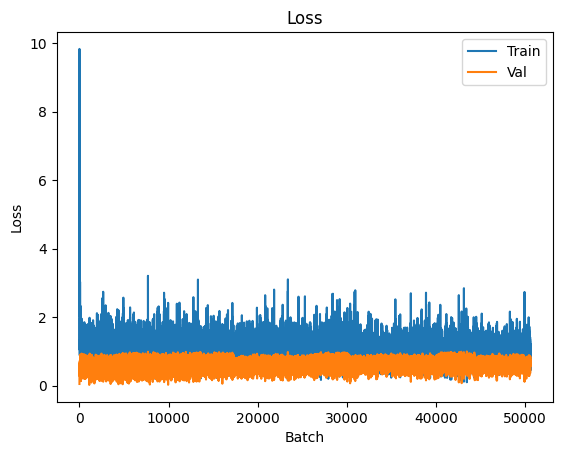

In [11]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Convert labels to one-hot encoded vectors
y_one_hot = tf.keras.utils.to_categorical(labels, num_classes=15)

# Define the batch size
batch_size = 256

# Calculate the number of batches
num_batches = len(x) // batch_size

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='elu', input_shape=(64,)),
    tf.keras.layers.Dense(2048, activation='elu'),
    tf.keras.layers.Dense(1050, activation='elu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model in batches
hist = {'loss': [], 'val_loss': []}
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size
    batch_x = x[start_index:end_index]
    batch_y = y_one_hot[start_index:end_index]
    batch_hist = model.train_on_batch(batch_x, batch_y)
    hist['loss'].append(batch_hist[0])
    hist['val_loss'].append(batch_hist[1])
    if i % 100 == 0:
        print(f'Batch {i+1}/{num_batches} - loss: {batch_hist[0]:.4f} - accuracy: {batch_hist[1]:.4f}')

# Handle any remaining data that may not fit into a batch of size batch_size
if len(x) % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = len(x)
    batch_x = x[start_index:end_index]
    batch_y = y_one_hot[start_index:end_index]
    batch_hist = model.train_on_batch(batch_x, batch_y)
    hist['loss'].append(batch_hist[0])
    hist['val_loss'].append(batch_hist[1])
    print(f'Batch {num_batches+1}/{num_batches+1} - loss: {batch_hist[0]:.4f} - accuracy: {batch_hist[1]:.4f}')

# Plot the loss
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [12]:
#import load_model
from tensorflow.keras.models import load_model

# Save the model
model.save('chessengine_13M.h5')

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section